<a href="https://colab.research.google.com/github/codebyrohith/Colab-PyTorch-NeuralNetwork/blob/main/16353852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris Dataset

In [54]:
# Step 1: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [55]:
# Step 2: Load and Prepare the Iris Dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
'target']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=columns)


In [56]:
# Map target classes to numerical values
df['target'] = df['target'].astype('category').cat.codes
# Split data into features and labels
X = df.iloc[:, :-1].values
y = df['target'].values
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [57]:
# Step 3: Define the Neural Network
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.model = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 3) # Output layer for 3 classes
  )
  def forward(self, x):
    return self.model(x)
# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [58]:
# Step 4: Train the Model
epochs = 20
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for X_batch, y_batch in train_loader:
    optimizer.zero_grad()
    outputs = model(X_batch)
    loss = criterion(outputs, y_batch)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 1.0977
Epoch 2/20, Loss: 1.0843
Epoch 3/20, Loss: 1.0604
Epoch 4/20, Loss: 1.0379
Epoch 5/20, Loss: 1.0110
Epoch 6/20, Loss: 0.9630
Epoch 7/20, Loss: 0.8908
Epoch 8/20, Loss: 0.7842
Epoch 9/20, Loss: 0.6699
Epoch 10/20, Loss: 0.5712
Epoch 11/20, Loss: 0.4745
Epoch 12/20, Loss: 0.4143
Epoch 13/20, Loss: 0.3746
Epoch 14/20, Loss: 0.3349
Epoch 15/20, Loss: 0.2881
Epoch 16/20, Loss: 0.2638
Epoch 17/20, Loss: 0.2218
Epoch 18/20, Loss: 0.2031
Epoch 19/20, Loss: 0.1653
Epoch 20/20, Loss: 0.1484


In [59]:
# Step 5: Validate the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for X_batch, y_batch in test_loader:
    outputs = model(X_batch)
    _, predicted = torch.max(outputs, 1)
    total += y_batch.size(0)
    correct += (predicted == y_batch).sum().item()
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 1.0000


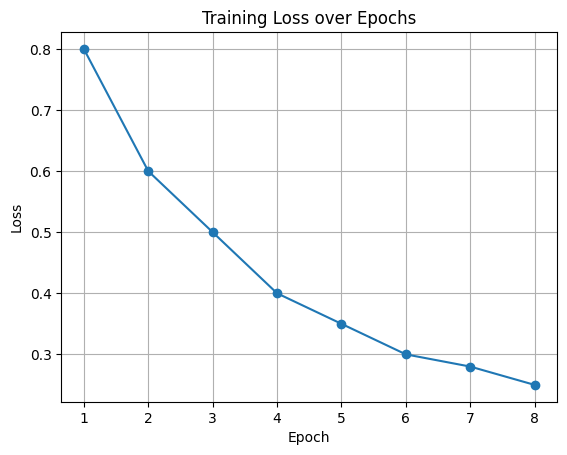

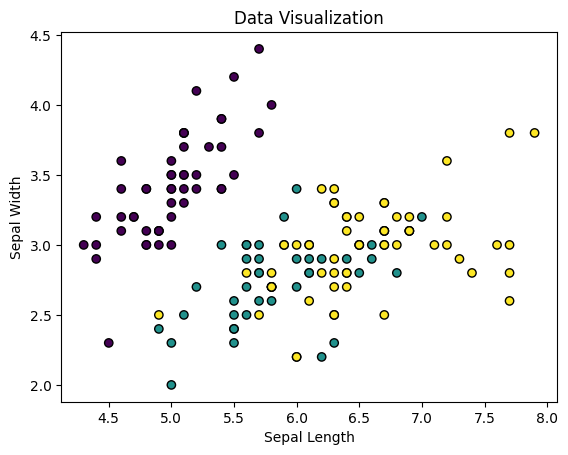

In [60]:
# Step 6: Visualize Training Loss and Data Distribution
# Plotting training loss (example values, replace with real loss values if collected)
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()
# Visualize data distribution
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Data Visualization')
plt.show()

#Breast Cancer Dataset

In [67]:
# Define column names (refer to dataset description for details)
columns = [
    'ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
    'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

# Load the dataset using pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None, names=columns)

In [68]:
# Map target classes to numerical values (M = 1, B = 0)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Split data into features (X) and labels (y)
X = df.drop(['ID', 'Diagnosis'], axis=1)
y = df['Diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Convert to NumPy array first
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)  # Convert to NumPy array first

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [69]:
# Step 3: Define the Neural Network
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.model = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 3) # Output layer for 3 classes
  )
  def forward(self, x):
    return self.model(x)
# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [70]:
# Step 4: Train the Model
epochs = 20
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for X_batch, y_batch in train_loader:
    optimizer.zero_grad()
    outputs = model(X_batch)
    loss = criterion(outputs, y_batch)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 1.0777
Epoch 2/20, Loss: 0.8380
Epoch 3/20, Loss: 0.5259
Epoch 4/20, Loss: 0.1846
Epoch 5/20, Loss: 0.0921
Epoch 6/20, Loss: 0.0773
Epoch 7/20, Loss: 0.0620
Epoch 8/20, Loss: 0.0534
Epoch 9/20, Loss: 0.0491
Epoch 10/20, Loss: 0.0500
Epoch 11/20, Loss: 0.0414
Epoch 12/20, Loss: 0.0362
Epoch 13/20, Loss: 0.0322
Epoch 14/20, Loss: 0.0289
Epoch 15/20, Loss: 0.0271
Epoch 16/20, Loss: 0.0250
Epoch 17/20, Loss: 0.0223
Epoch 18/20, Loss: 0.0229
Epoch 19/20, Loss: 0.0195
Epoch 20/20, Loss: 0.0184


In [71]:
# Step 5: Validate the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for X_batch, y_batch in test_loader:
    outputs = model(X_batch)
    _, predicted = torch.max(outputs, 1)
    total += y_batch.size(0)
    correct += (predicted == y_batch).sum().item()
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9825


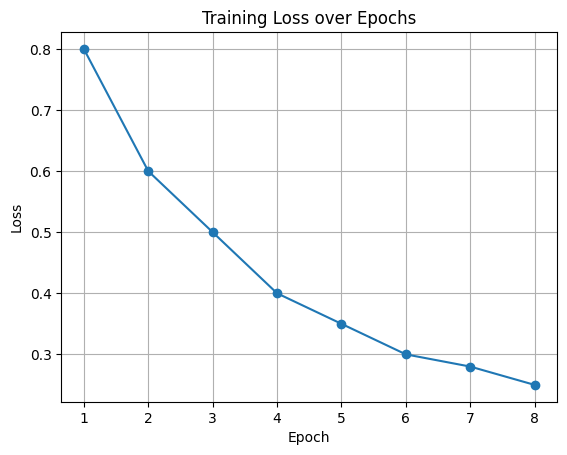

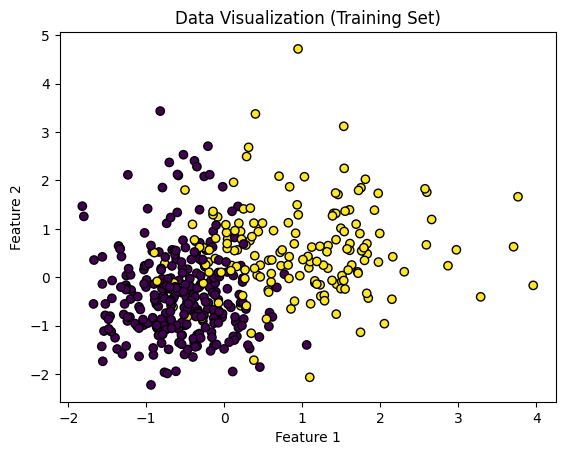

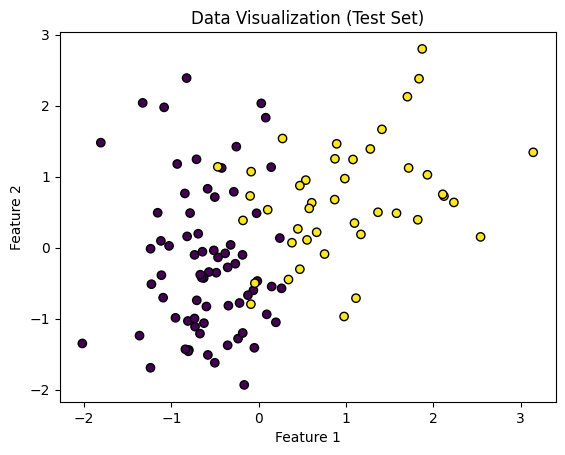

In [74]:
# Step 6: Visualize Training Loss and Data Distribution
# Plotting training loss (example values, replace with real loss values if collected)
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()
# Visualize data distribution
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')  # Using X_train and y_train
plt.xlabel('Feature 1')  # Replace with actual feature name (e.g., 'radius_mean')
plt.ylabel('Feature 2')  # Replace with actual feature name (e.g., 'texture_mean')
plt.title('Data Visualization (Training Set)')
plt.show()

# Optionally, visualize test set as well
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k')  # Using X_test and y_test
plt.xlabel('Feature 1')  # Replace with actual feature name
plt.ylabel('Feature 2')  # Replace with actual feature name
plt.title('Data Visualization (Test Set)')
plt.show()

#Wine Dataset

In [75]:
# Define column names (refer to dataset description for details)
columns = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]

# Load the dataset using pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None, names=columns)

In [77]:
# Split data into features (X) and labels (y)
X = df.drop('Class', axis=1)
y = df['Class']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Convert to NumPy array first
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)  # Convert to NumPy array first

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [78]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),  # Input layer with X_train.shape[1] features
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 3)  # Output layer for 3 wine classes
        )

    def forward(self, x):
        return self.model(x)

In [80]:
# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the Model
epochs = 20  # You can adjust the number of epochs
train_losses = []  # To store training loss values for each epoch

for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for X_batch, y_batch in train_loader:
    optimizer.zero_grad()
    outputs = model(X_batch)
    loss = criterion(outputs, y_batch)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  epoch_loss = running_loss / len(train_loader)
  train_losses.append(epoch_loss)
  print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/20, Loss: 0.9134
Epoch 2/20, Loss: 0.5207
Epoch 3/20, Loss: 0.0849
Epoch 4/20, Loss: 0.0109
Epoch 5/20, Loss: 0.0043
Epoch 6/20, Loss: 0.0025
Epoch 7/20, Loss: 0.0017
Epoch 8/20, Loss: 0.0012
Epoch 9/20, Loss: 0.0009
Epoch 10/20, Loss: 0.0007
Epoch 11/20, Loss: 0.0005
Epoch 12/20, Loss: 0.0005
Epoch 13/20, Loss: 0.0004
Epoch 14/20, Loss: 0.0003
Epoch 15/20, Loss: 0.0003
Epoch 16/20, Loss: 0.0002
Epoch 17/20, Loss: 0.0002
Epoch 18/20, Loss: 0.0002
Epoch 19/20, Loss: 0.0002
Epoch 20/20, Loss: 0.0001


In [81]:
# Step 5: Validate the Model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculations during validation
  for X_batch, y_batch in test_loader:
    outputs = model(X_batch)
    _, predicted = torch.max(outputs, 1)  # Get the predicted class labels
    total += y_batch.size(0)  # Count the total number of samples
    correct += (predicted == y_batch).sum().item()  # Count the correctly classified samples

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


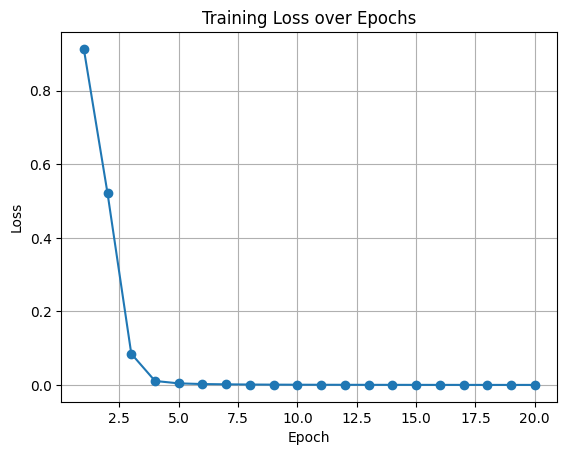

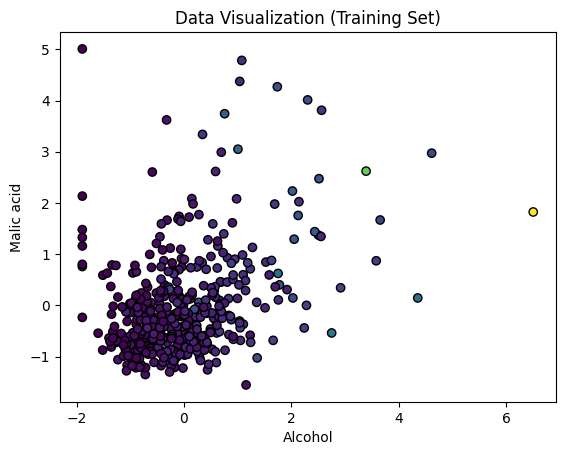

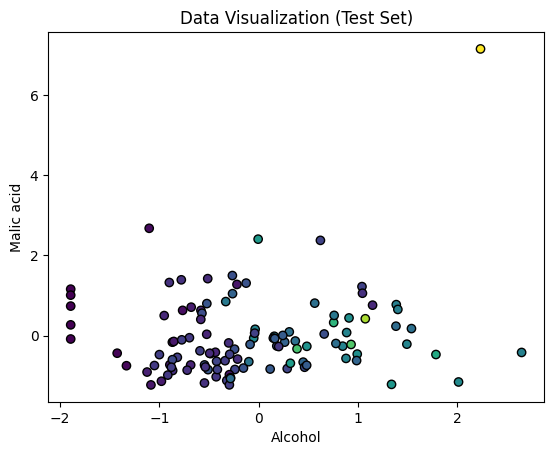

In [82]:
# Step 6: Visualize Training Loss and Data Distribution

# Plotting training loss
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Visualize data distribution (using first two features as an example)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel(columns[1])  # Use actual feature name (e.g., 'Alcohol')
plt.ylabel(columns[2])  # Use actual feature name (e.g., 'Malic acid')
plt.title('Data Visualization (Training Set)')
plt.show()

# Optionally, visualize test set as well
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k')
plt.xlabel(columns[1])  # Use actual feature name
plt.ylabel(columns[2])  # Use actual feature name
plt.title('Data Visualization (Test Set)')
plt.show()